# Lesson - Machine Learning I: K-nearest Neighbors(KNN)

In this lesson, we will apply the machine learning algorithm K-nearest Neighbours or  **KNN** to a practical problem. K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

### Problem Definition
AirBnB is a marketplace for short term rentals that allows you to list part or all of your living space for others to rent. You can rent everything from a room in an apartment to your entire house on AirBnB. Because most of the listings are on a short-term basis, AirBnB has grown to become a popular alternative to hotels. One challenge that hosts looking to rent their living space face is determining the optimal nightly rent price.

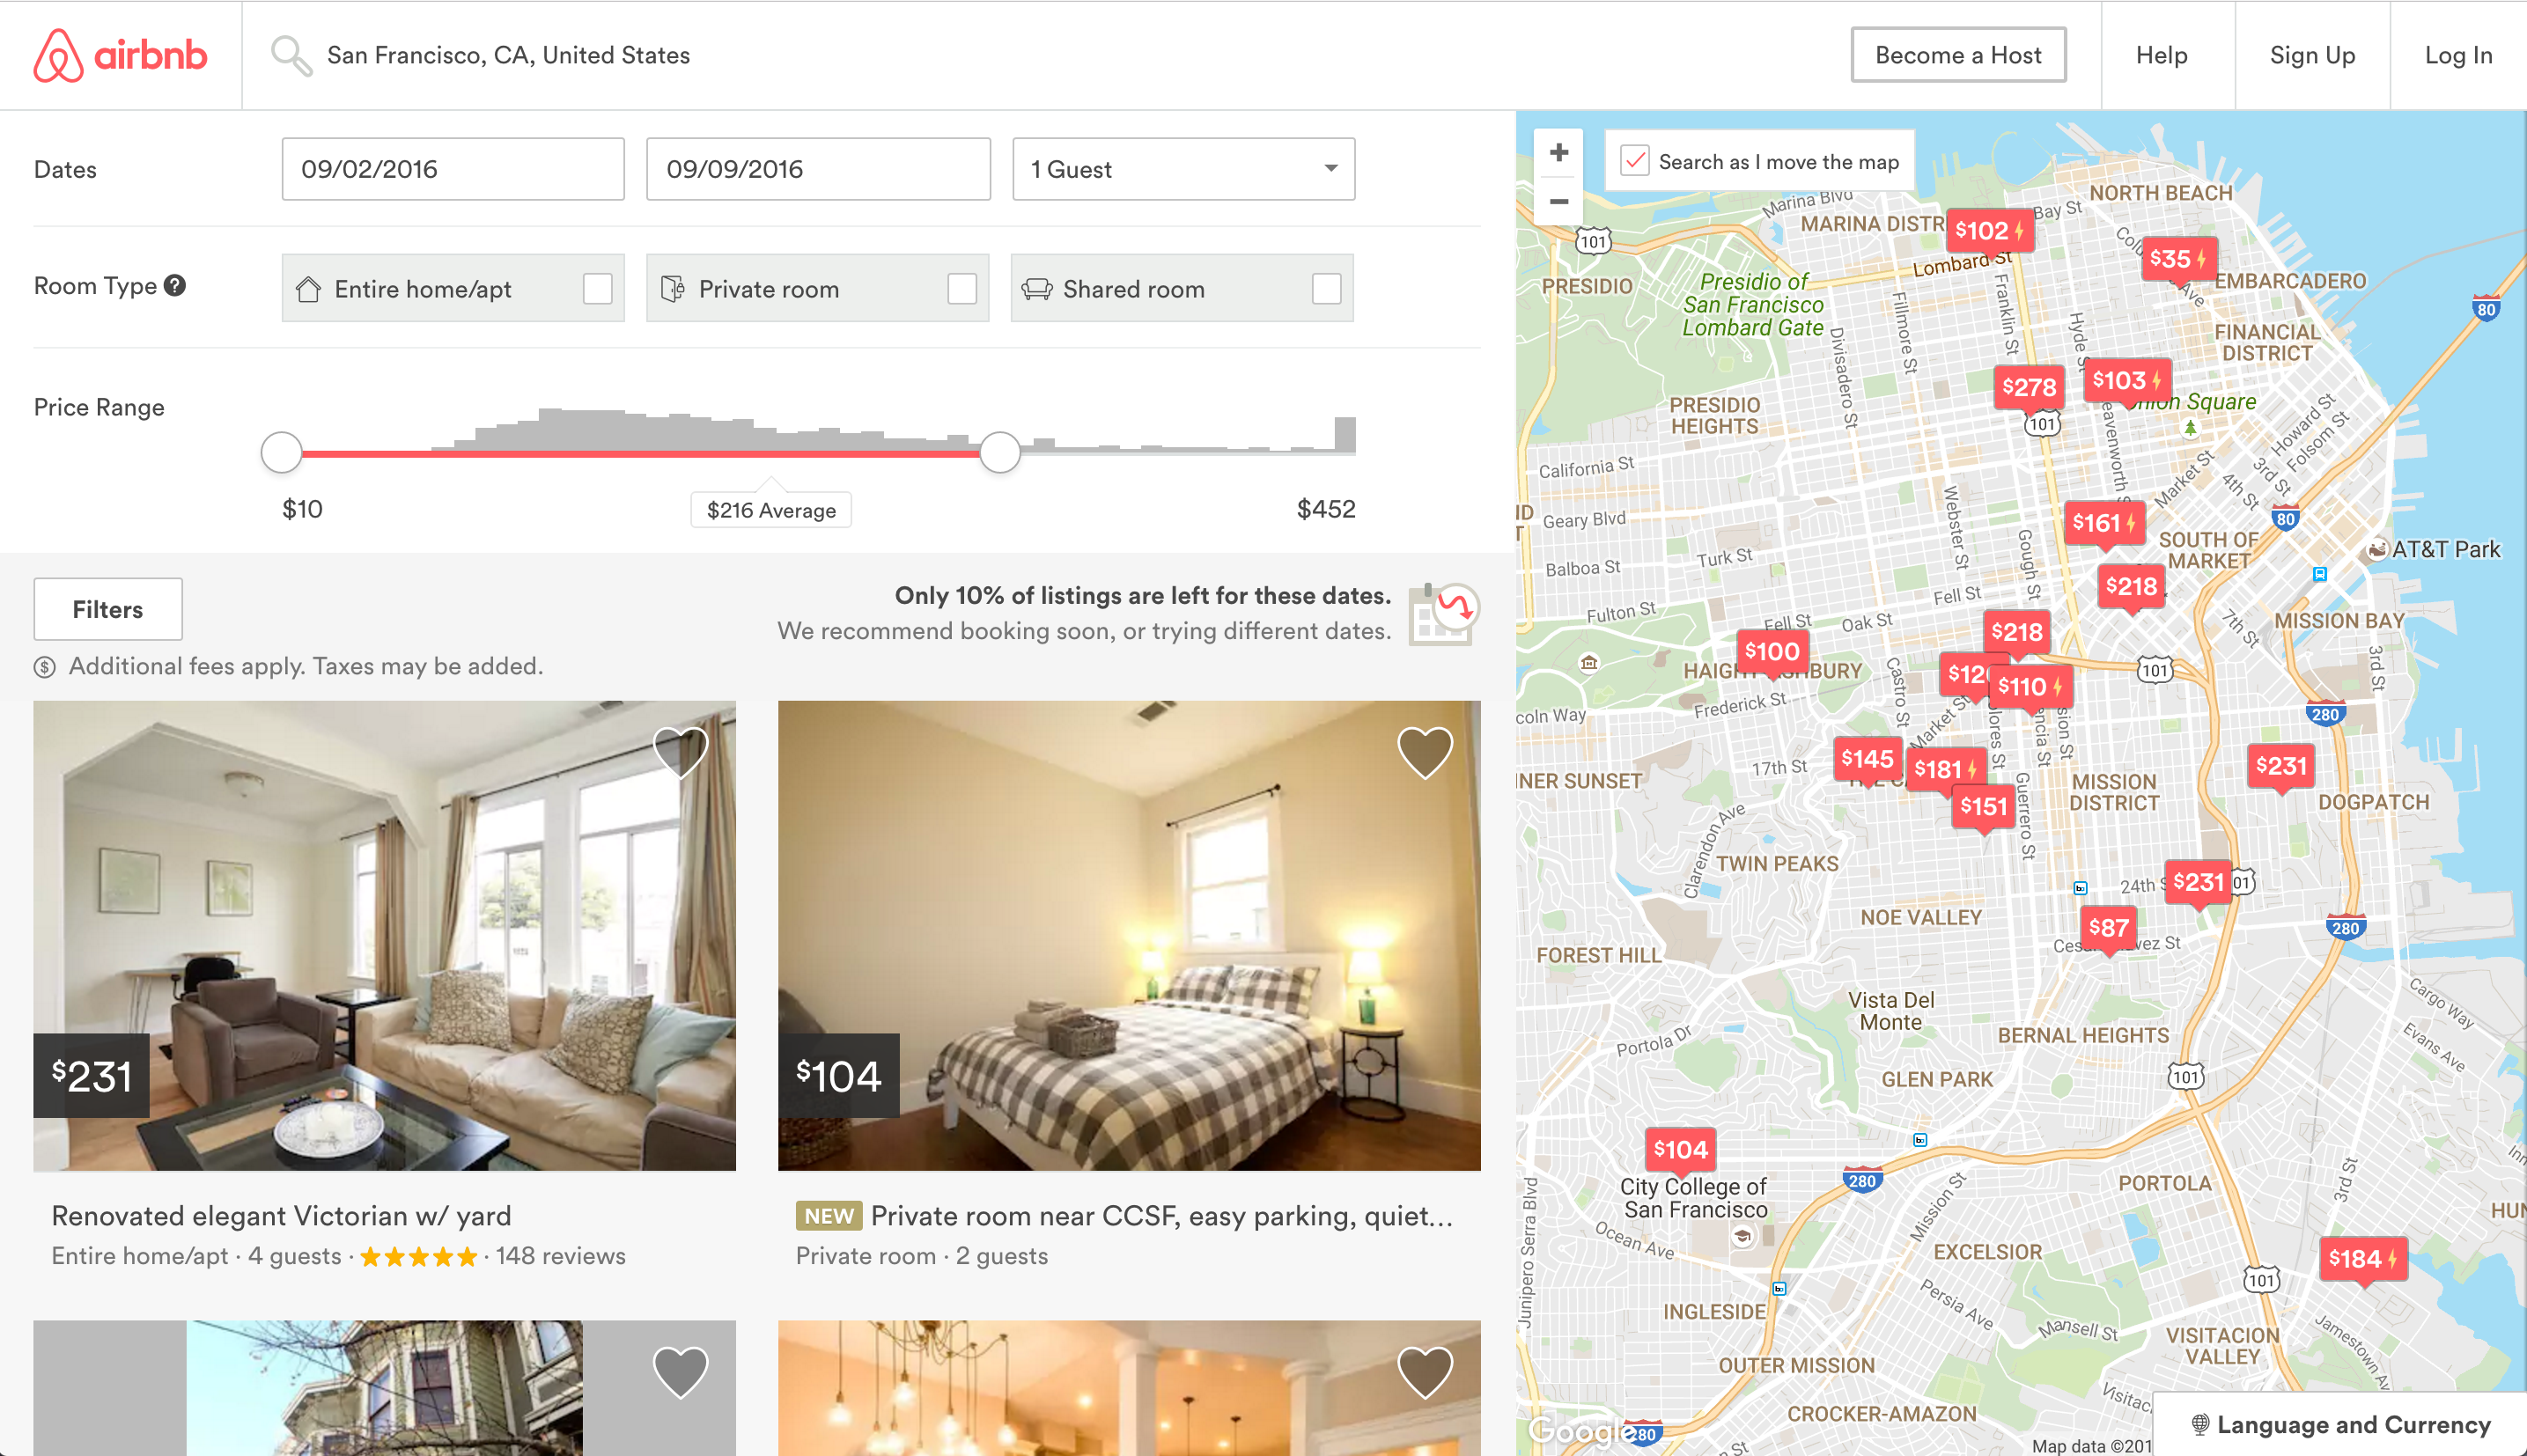

As a host, if we try to charge above market price for a living space we'd like to rent, then renters will select more affordable alternatives which are similar to ours. If we set our nightly rent price too low, we'll miss out on potential revenue. One strategy we could use is to:

- find a few listings that are similar to ours,
- average the listed price for the ones most similar to ours,
- set our listing price to this calculated average price.

We will adopt the above strategy using KNN algorithm.

### Dataset
A group named [Inside AirBnB](http://insideairbnb.com/get-the-data.html) has extracted data on a sample of the listings for many of the major cities on the website. In this project, we'll be working with their dataset from October 3, 2015 on the listings from Washington, D.C., the capital of the United States.  Each row in the dataset is a specific listing that's available for renting on AirBnB in the Washington, D.C. area.

We've removed many of the columns in the original dataset and renamed the file to `dc_airbnb.csv`. Here are the columns we kept:

`host_response_rate`: the response rate of the host
`host_acceptance_rate`: number of requests to the host that convert to rentals
`host_listings_count`: number of other listings the host has
`latitude`: latitude dimension of the geographic coordinates
`longitude`: longitude part of the coordinates
`city`: the city the living space resides
`zipcode`: the zip code the living space resides
`state`: the state the living space resides
`accommodates`: the number of guests the rental can accommodate
`room_type`: the type of living space (Private room, Shared room or Entire home/apt
`bedrooms`: number of bedrooms included in the rental
`bathrooms`: number of bathrooms included in the rental
`beds`: number of beds included in the rental
`price`: nightly price for the rental
`cleaning_fee`: additional fee used for cleaning the living space after the guest leaves
`security_deposit`: refundable security deposit, in case of damages
`minimum_nights`: minimum number of nights a guest can stay for the rental
`maximum_nights`: maximum number of nights a guest can stay for the rental
`number_of_reviews`: number of reviews that previous guests have left

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [2]:
dc_listings = pd.read_csv('dc_airbnb.csv') 
dc_listings.head()

host_response_rate host_acceptance_rate  host_listings_count  accommodates  \
0                92%                  91%                   26             4   
1                90%                 100%                    1             6   
2                90%                 100%                    2             1   
3               100%                  NaN                    1             2   
4                92%                  67%                    1             4   

         room_type  bedrooms  bathrooms  beds    price cleaning_fee  \
0  Entire home/apt       1.0        1.0   2.0  $160.00      $115.00   
1  Entire home/apt       3.0        3.0   3.0  $350.00      $100.00   
2     Private room       1.0        2.0   1.0   $50.00          NaN   
3     Private room       1.0        1.0   1.0   $95.00          NaN   
4  Entire home/apt       1.0        1.0   1.0   $50.00       $15.00   

  security_deposit  minimum_nights  maximum_nights  number_of_reviews  \
0          $100.00               1            1125                  0   
1              NaN               2              30                 65   
2              NaN               2            1125                  1   
3              NaN               1            1125                  0   
4          $450.00               7            1125                  0   

    latitude  longitude           city zipcode state  
0  38.890046 -77.002808     Washington   20003    DC  
1  38.880413 -76.990485     Washington   20003    DC  
2  38.955291 -76.986006    Hyattsville   20782    MD  
3  38.872134 -77.019639     Washington   20024    DC  
4  38.996382 -77.041541  Silver Spring   20910    MD

In [3]:
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3289 non-null   object 
 1   host_acceptance_rate  3109 non-null   object 
 2   host_listings_count   3723 non-null   int64  
 3   accommodates          3723 non-null   int64  
 4   room_type             3723 non-null   object 
 5   bedrooms              3702 non-null   float64
 6   bathrooms             3696 non-null   float64
 7   beds                  3712 non-null   float64
 8   price                 3723 non-null   object 
 9   cleaning_fee          2335 non-null   object 
 10  security_deposit      1426 non-null   object 
 11  minimum_nights        3723 non-null   int64  
 12  maximum_nights        3723 non-null   int64  
 13  number_of_reviews     3723 non-null   int64  
 14  latitude              3723 non-null   float64
 15  longitude            

### K-nearest Neighbors

The strategy we wanted to use:

- Find a few similar listings.
- Calculate the average nightly rental price of these listings.
- Set the average price as the price for our listing. 
The k-nearest neighbors algorithm is similar to this strategy. 

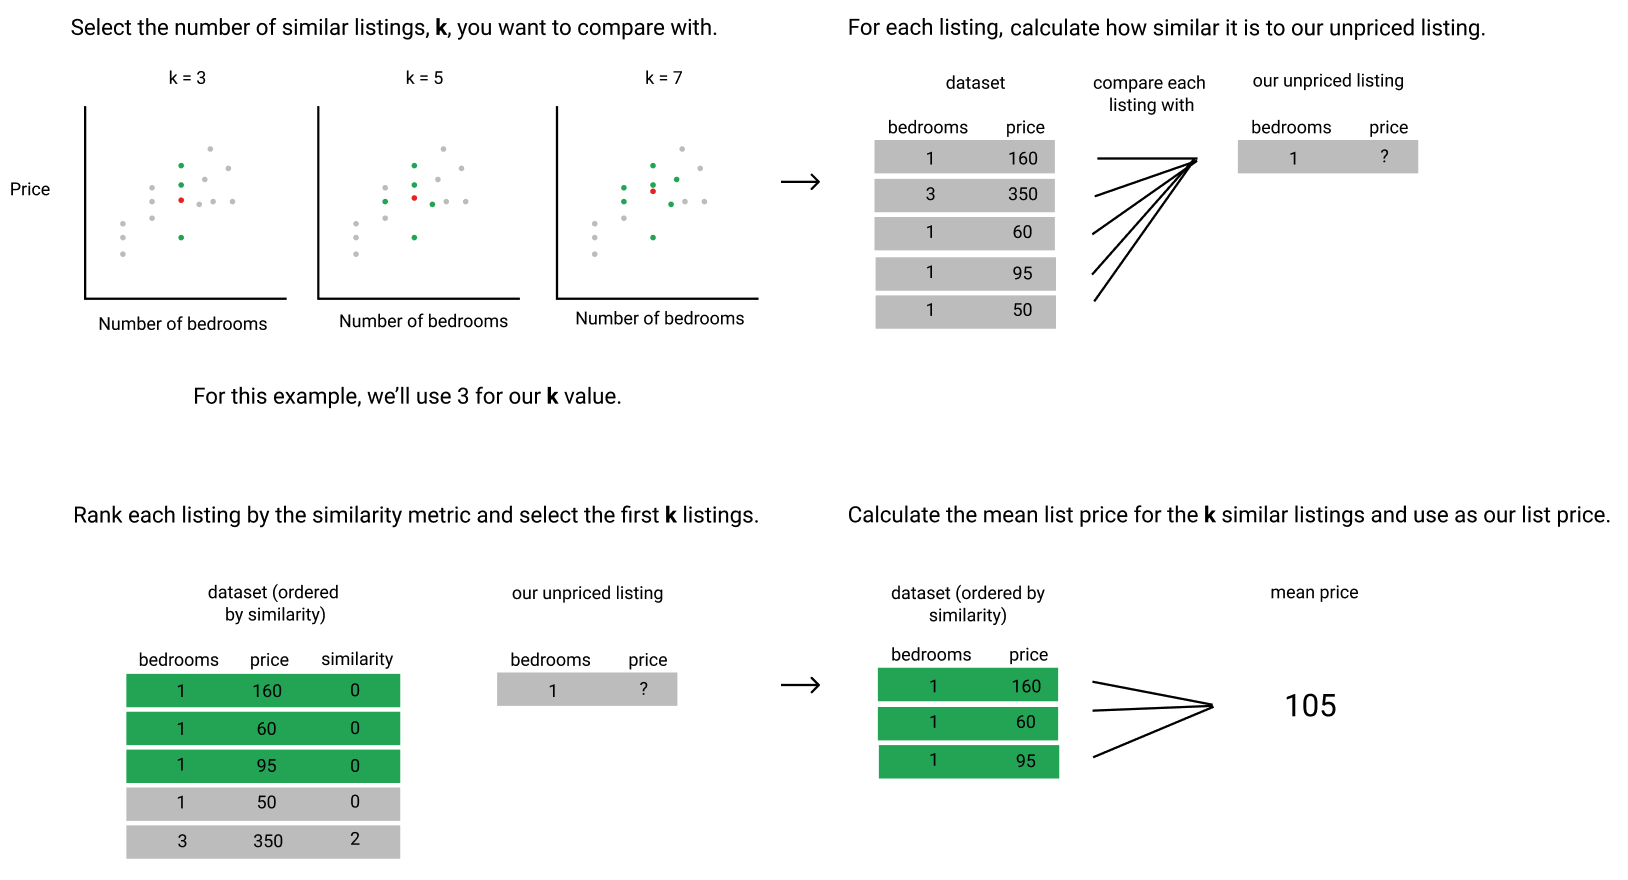

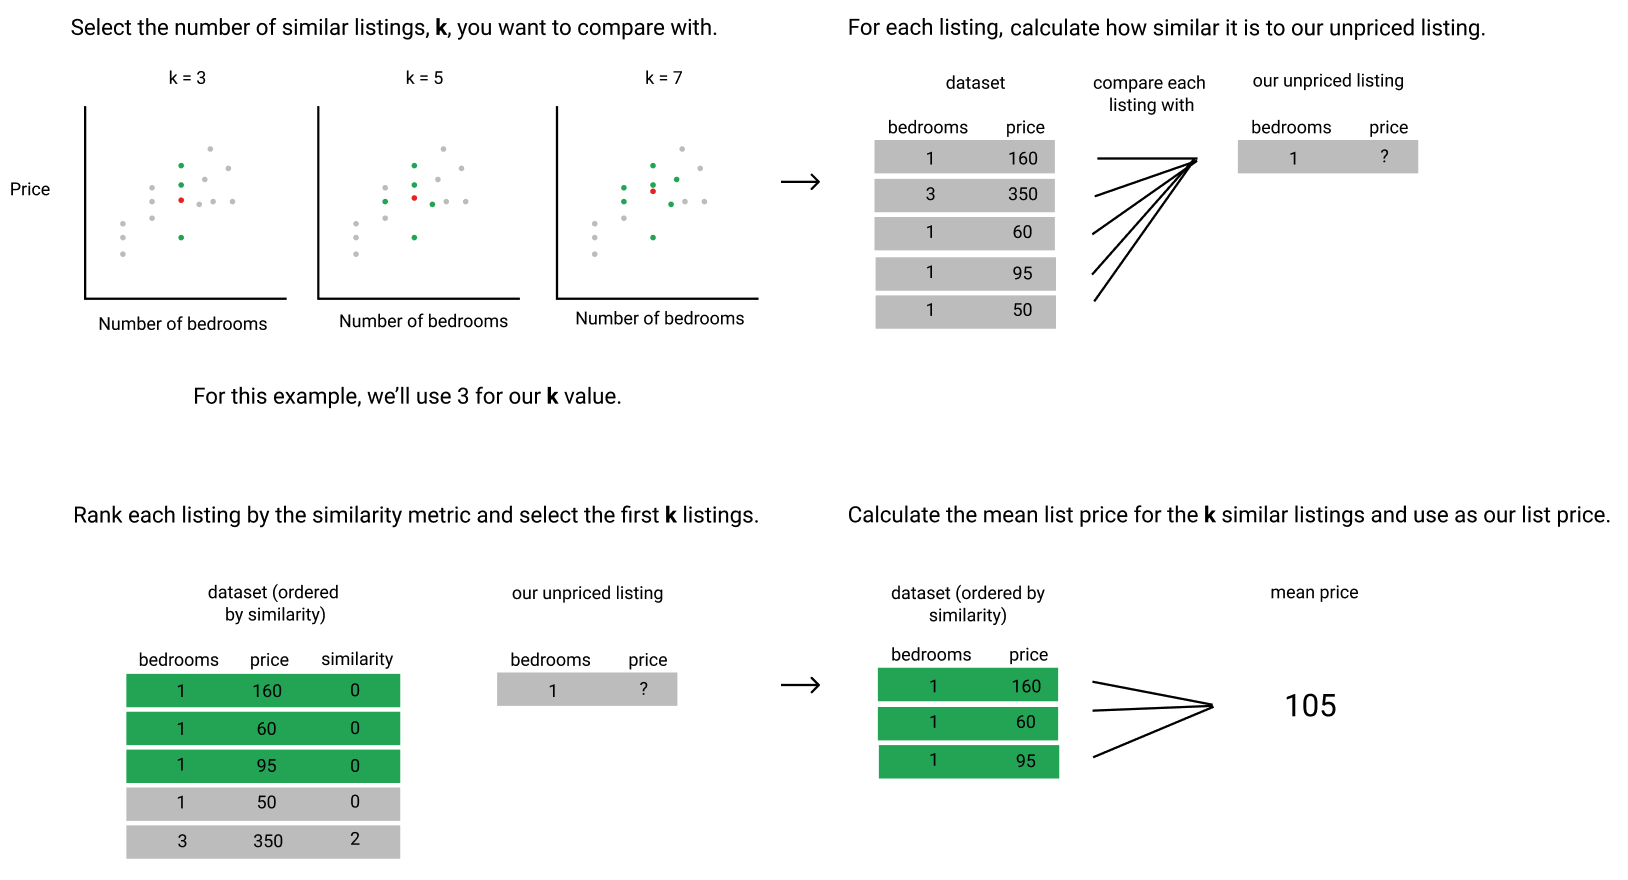

There are 2 other things we need to consider in more detail:

- the similarity metric
- how to choose the k value
We have to define what similarity metric we're going to use. Then, we'll implement the k-nearest neighbors algorithm and use it to suggest a price for a new, unpriced listing. We'll use a k value of 5 in this exercise. 

### Euclidean Distance
The similarity metric works by comparing a fixed set of numerical features, another word for attributes, between 2 observations, or living spaces in our case. When trying to predict a continuous value, like price, the main similarity metric that's used is **Euclidean distance**.The general formula for Euclidean distance is:
$$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$$
where q1 to qn represent the feature values for one observation and p1 to pn represent the feature values for the other observation. Following diagram breaks down the Euclidean distance between the first 2 observations in the dataset using only the `host_listings_count`, `accommodates`, `bedrooms`, `bathrooms`, and `beds` columns:

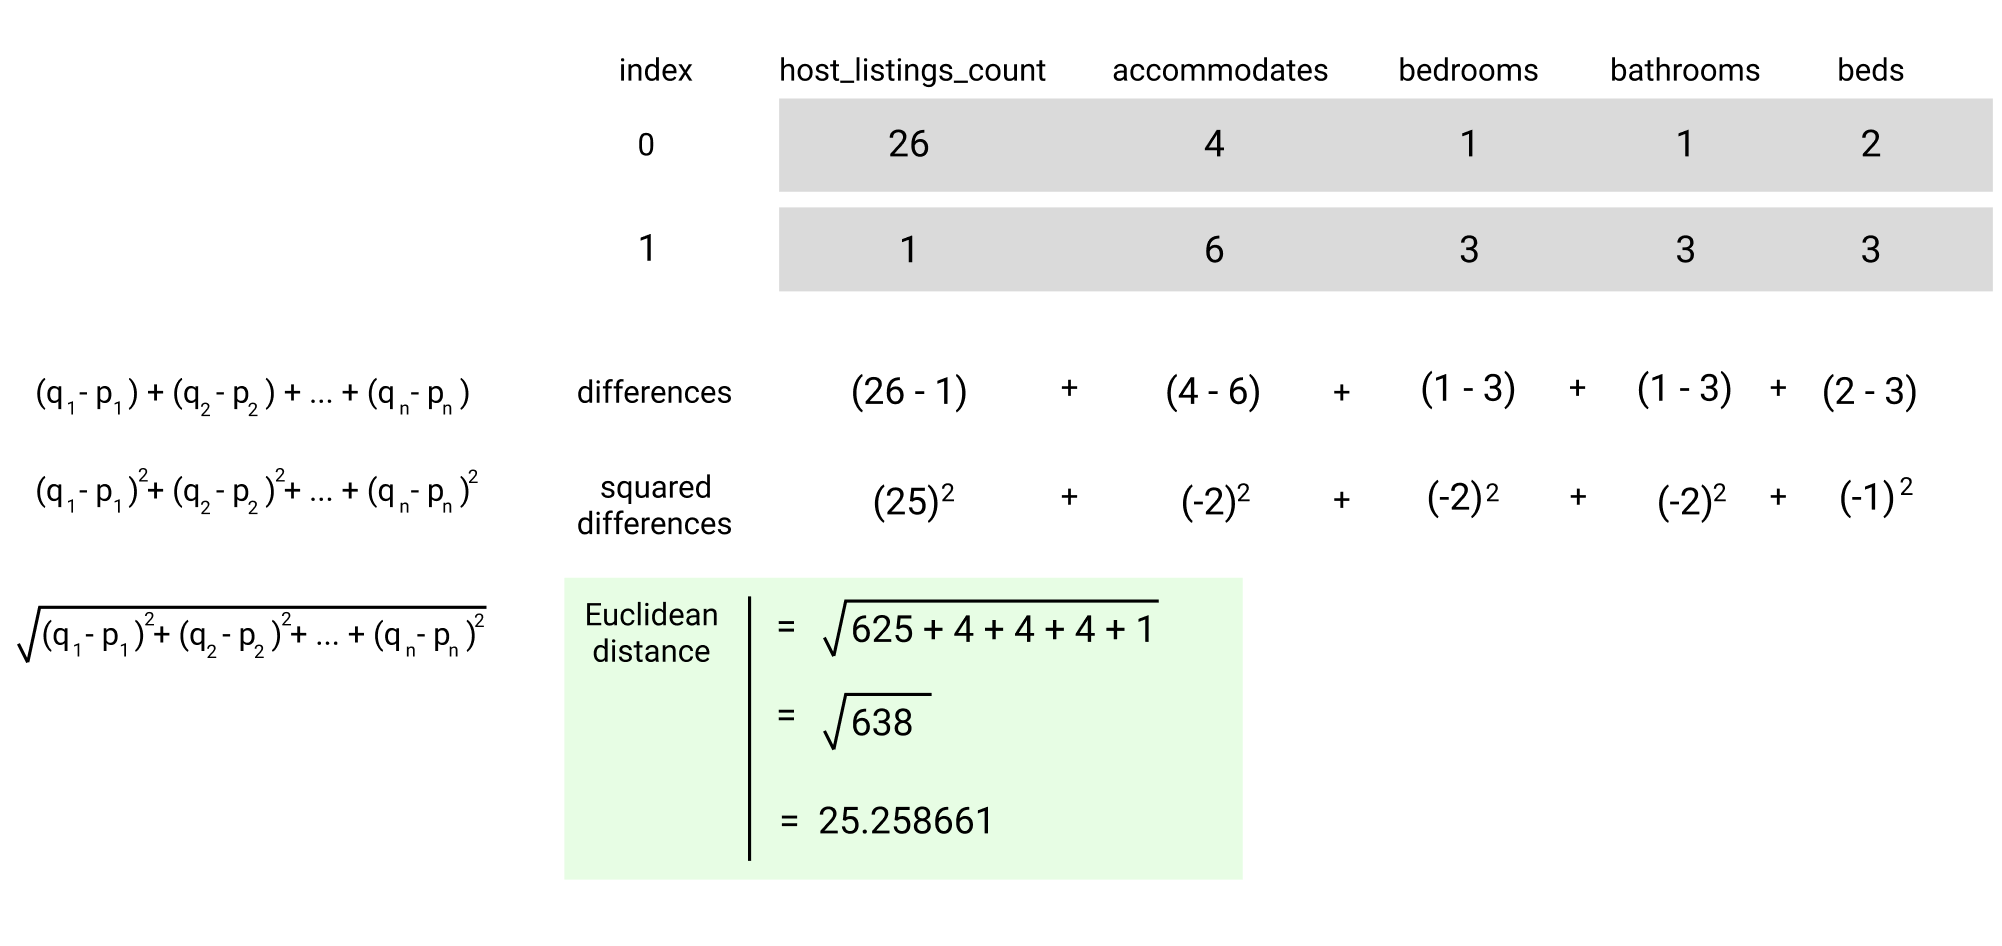

In this exercise, we'll use just one feature to keep things simple. Since we're only using one feature, this is known as the **univariate case** in which above formula looks is reduced to:

$$d = \sqrt{(q_1 - p_1)^2}$$

The square root and the squared power cancel and the formula simplifies to:
$$d = | q_1 - p_1 |$$

The living space that we want to rent can accommodate 3 people. We'll first calculate the distance, using just the `accommodates` feature, between the first living space in the dataset and our own.


**Exercise**

Calculate the Euclidean distance between our living space, which can accommodate `3` people, and the first living space in the `dc_listings` Dataframe.
Assign the result to `first_distance` and display the value using the `print` function.

In [4]:
first_distance = abs(3 - dc_listings['accommodates'][0])
print(first_distance)

1


### Calculate Distance for all Observations
The Euclidean distance between the first row in the `dc_listings` Dataframe and our own living space is 1. How do we know if this is high or low? If we look at the Euclidean distance equation itself, the lowest value we can achieve is 0. This happens when the value for the feature is exactly the same for both observations we're comparing. If `p1=q1`, then `d=|q1−p1|` which results in `d=0`. The closer to 0 the distance the more similar the living spaces are.

If we wanted to calculate the Euclidean distance between each living space in the dataset and a living space that accommodates 8 people, here's a preview of what that would look like.

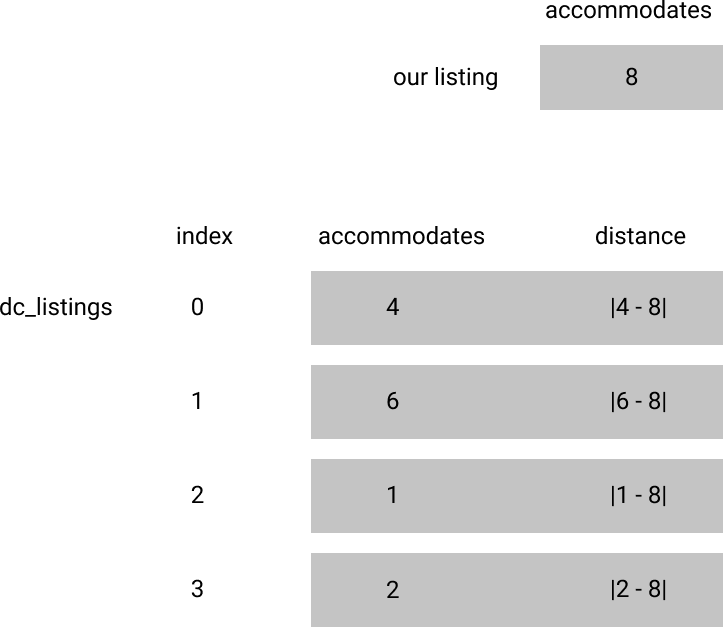

Then, we can rank the existing living spaces by ascending distance values, the proxy for similarity.

**Exercise**

- Calculate the distance between each value in the `accommodates` column from `dc_listings` and the value 3, which is the number of people our listing accommodates:
- Use the apply method to calculate the absolute value between each value in `accommodates` and `3` and return a new Series containing the distance values.
- Assign the distance values to the `distance` column.
Use the Series method `value_counts` and the `print` function to display the unique value counts for the distance column.

In [5]:
def euclidean_univariate(value_1, value_2):
    distance = abs(value_1 - value_2)
    return distance

dc_listings['distance'] = dc_listings['accommodates'].apply(euclidean_univariate, value_2 = 3)
print(dc_listings.distance.value_counts().sort_index())

0      461
1     2294
2      503
3      279
4       35
5       73
6       17
7       22
8        7
9       12
10       2
11       4
12       6
13       8
Name: distance, dtype: int64


### Randomizing and Sorting

From above it can be seen that 461 living spaces can accommodate 3 people just like ours. This means the 5 "nearest neighbors" we select after sorting all will have a distance value of 0. If we sort by the `distance` column and then just select the first 5 living spaces, we would be biasing the result to the ordering of the dataset as under:

In [6]:
print(dc_listings[dc_listings["distance"] == 0]["accommodates"].head())

26    3
34    3
36    3
40    3
44    3
Name: accommodates, dtype: int64


Instead, we will randomize the ordering of the dataset and then sort the Dataframe by the distance column. This way, all of the living spaces with the same number of bedrooms will still be at the top of the Dataframe but will be in random order across the first 461 rows.

**Exercise**

- Randomize the order of the rows in dc_listings:
- Use the `np.random.permutation()` [function](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.permutation.html) to return a NumPy array of shuffled index values.
- Use the Dataframe method `[loc])`(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html?highlight=loc#pandas.DataFrame.loc) to return a new Dataframe containing the shuffled order.
- Assign the new Dataframe back to `dc_listings`.
- After randomization, sort `dc_listings` by the `distance` column and assign back to `dc_listings`.
- Display the first 10 values in the `price` column using the print function.

In [7]:
np.random.seed(1) # to get consistent results
shuffled_index = np.random.permutation(len(dc_listings.index))
dc_listings = dc_listings.loc[shuffled_index].sort_values('distance')
print(dc_listings['price'].head(10))

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


### Average Price
Before we can select the 5 most similar living spaces and compute the average price, we need to clean the price column. Right now, the price column contains comma characters (,) and dollar sign characters and is formatted as a text column instead of a numeric one. We need to remove these values and convert the entire column to the float datatype. Then, we can calculate the average price.

**Exercise**

- Remove the commas (,) and dollar sign characters sign from the `price` column:
- Use the str accessor so we can apply string methods to each value in the column followed by the string method `replace` to replace all comma characters with the empty character: `stripped_commas = dc_listings['price'].str.replace(',', '')`
- Repeat to remove the dollar sign characters as well.
- Convert the new Series object containing the cleaned values to the float datatype and assign back to the `price` column in dc_listings.
- Calculate the mean of the first 5 values in the price column and assign to `mean_price`.
- Use the `print` function to display mean_price.

In [8]:
dc_listings['price'] = dc_listings.price.str.replace(',', '')
dc_listings['price'] = dc_listings.price.str.replace('$', '').astype('float')
mean_price = dc_listings['price'][0:5].mean()
print(mean_price)

156.6


### Function for Making Predictions based on other Values

We will now write a more general function that can suggest the optimal price for other values of the `accommodates` column.

**Exercise**

Write a function named `predict_price` that can use the k-nearest neighbors machine learning technique to calculate the suggested price for any value for `accommodates`. This function should:

- Take in a single parameter, `new_listing`, that describes the number of people to be accommodated.
- Read again the dc_airbnb.csv file and assigns it to a new Dataframe named `temp_df`. 
- Calculate the distance between each value in the `accommodates` column and the `new_listing` value that was passed in. Assign the resulting Series object to the `distance` column in `temp_df`.
- Sort temp_df by the `distance` column and select the first 5 values in the `price` column. Don't randomize the ordering of `temp_df`.
- Calculate the mean of these 5 values and use that as the return value for the entire `predict_price` function.
- Use the `predict_price` function to suggest a price for a living space that:

- accommodates 1 person, assign the suggested price to `acc_one`.
- accommodates 2 people, assign the suggested price to `acc_two`.
- accommodates 4 people, assign the suggested price to `acc_four`

In [12]:
dc_listings_new = pd.read_csv('dc_airbnb.csv') 
dc_listings_new['price'] = dc_listings_new.price.str.replace(',', '')
dc_listings_new['price'] =dc_listings_new.price.str.replace('$', '').astype('float')


In [13]:

def predict_price(new_listing):
    distance = []
    temp_df = dc_listings_new.copy()
    for value in temp_df['accommodates']:
        difference = abs(value - new_listing)
        distance.append(difference)
    temp_df['distance'] = distance
    temp_df = temp_df.sort_values('distance')
    mean_price = temp_df['price'][0:5].mean()
    return mean_price

In [14]:
acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)
print(acc_one, acc_two, acc_four)

72.0 95.8 161.0


### Conclusion

We stepped through the entire machine learning workflow, from selecting a feature to testing the model. To explore the basics of machine learning, we limited ourselves to only using one feature (the univariate case) and a fixed k value of 5. 

Notes:
Above function can also be written as

```
def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)
```    